In [ ]:
%%time
import tensorflow
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2, os, random
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot

CPU times: user 3.98 s, sys: 567 ms, total: 4.55 s
Wall time: 4.93 s


In [ ]:
import glob
import tensorflow as tf

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

In [ ]:

from tqdm.notebook import tqdm
from termcolor import colored
import albumentations as A

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/new/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
directory = "/tmp/chest_xray"

In [ ]:
print(colored("Required libraries were succesfully imported...", color = "green", attrs = ["bold", "dark"]))

Required libraries were succesfully imported...


In [ ]:
print(tensorflow.config.list_physical_devices("GPU"))

print("________________________________________________")

print(tensorflow.test.is_gpu_available(cuda_only = False, min_cuda_compute_capability = None))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
________________________________________________
True


In [ ]:
print("Current tensorflow version == {}".format(tensorflow. __version__))

Current tensorflow version == 2.11.0


In [ ]:
train_df = glob.glob("/tmp/chest_xray/train/**/*.jpeg")
test_df = glob.glob("/tmp/chest_xray/test/**/*.jpeg")
validation_df = glob.glob("/tmp/chest_xray/val/**/*.jpeg")

print(colored("The datasets were succesfully loaded...", color = "green", attrs = ["bold", "dark"]))

The datasets were succesfully loaded...


In [ ]:
train_df[:5], test_df[:5]

(['/tmp/chest_xray/train/NORMAL/IM-0549-0001-0002.jpeg',
  '/tmp/chest_xray/train/NORMAL/NORMAL2-IM-0473-0001.jpeg',
  '/tmp/chest_xray/train/NORMAL/IM-0279-0001.jpeg',
  '/tmp/chest_xray/train/NORMAL/IM-0355-0001.jpeg',
  '/tmp/chest_xray/train/NORMAL/IM-0636-0001.jpeg'],
 ['/tmp/chest_xray/test/NORMAL/NORMAL2-IM-0289-0001.jpeg',
  '/tmp/chest_xray/test/NORMAL/NORMAL2-IM-0198-0001.jpeg',
  '/tmp/chest_xray/test/NORMAL/NORMAL2-IM-0309-0001.jpeg',
  '/tmp/chest_xray/test/NORMAL/NORMAL2-IM-0292-0001.jpeg',
  '/tmp/chest_xray/test/NORMAL/IM-0102-0001.jpeg'])

In [ ]:
print("There is {} images in the training dataset".format(len(train_df)))
print("There is {} images in the test dataset".format(len(test_df)))
print("There is {} images in the validation dataset".format(len(validation_df)))

There is 5216 images in the training dataset
There is 624 images in the test dataset
There is 16 images in the validation dataset


In [ ]:
datasets, pneumonia_lung, normal_lung = ["train", "test", "val"], [], []

for i in datasets:
    path = os.path.join(directory, i)
    normal = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    pneumonia = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    normal_lung.extend(normal), pneumonia_lung.extend(pneumonia)

print("The number of pneumonia images is {}".format(len(pneumonia_lung)))
print("The number of non-pneumonia images is {}".format(len(normal_lung)))

The number of pneumonia images is 4273
The number of non-pneumonia images is 1583


In [ ]:
random.shuffle(normal_lung)
random.shuffle(pneumonia_lung)
images = normal_lung[:50] + pneumonia_lung[:50]
images[:10]

['/tmp/chest_xray/train/NORMAL/IM-0457-0001.jpeg',
 '/tmp/chest_xray/train/NORMAL/NORMAL2-IM-0886-0001.jpeg',
 '/tmp/chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg',
 '/tmp/chest_xray/train/NORMAL/NORMAL2-IM-1141-0001.jpeg',
 '/tmp/chest_xray/test/NORMAL/NORMAL2-IM-0112-0001.jpeg',
 '/tmp/chest_xray/train/NORMAL/NORMAL2-IM-1098-0001.jpeg',
 '/tmp/chest_xray/train/NORMAL/IM-0612-0001-0002.jpeg',
 '/tmp/chest_xray/train/NORMAL/NORMAL2-IM-0589-0001.jpeg',
 '/tmp/chest_xray/train/NORMAL/IM-0503-0001.jpeg',
 '/tmp/chest_xray/train/NORMAL/IM-0563-0001.jpeg']

NORMAL


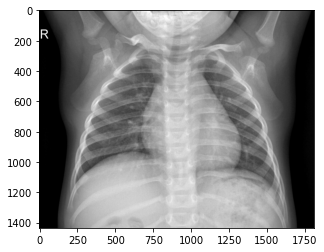

In [ ]:
normal_lung_image = load_img("/tmp/chest_xray/train/NORMAL/IM-0119-0001.jpeg")
print("NORMAL")
plt.imshow(normal_lung_image)
plt.show()

PNEUMONIA


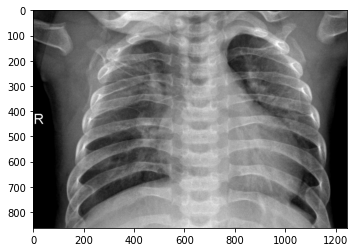

In [ ]:
normal_lung_image = load_img("/tmp/chest_xray/train/PNEUMONIA/person1001_bacteria_2932.jpeg")
print("PNEUMONIA")
plt.imshow(normal_lung_image)
plt.show()

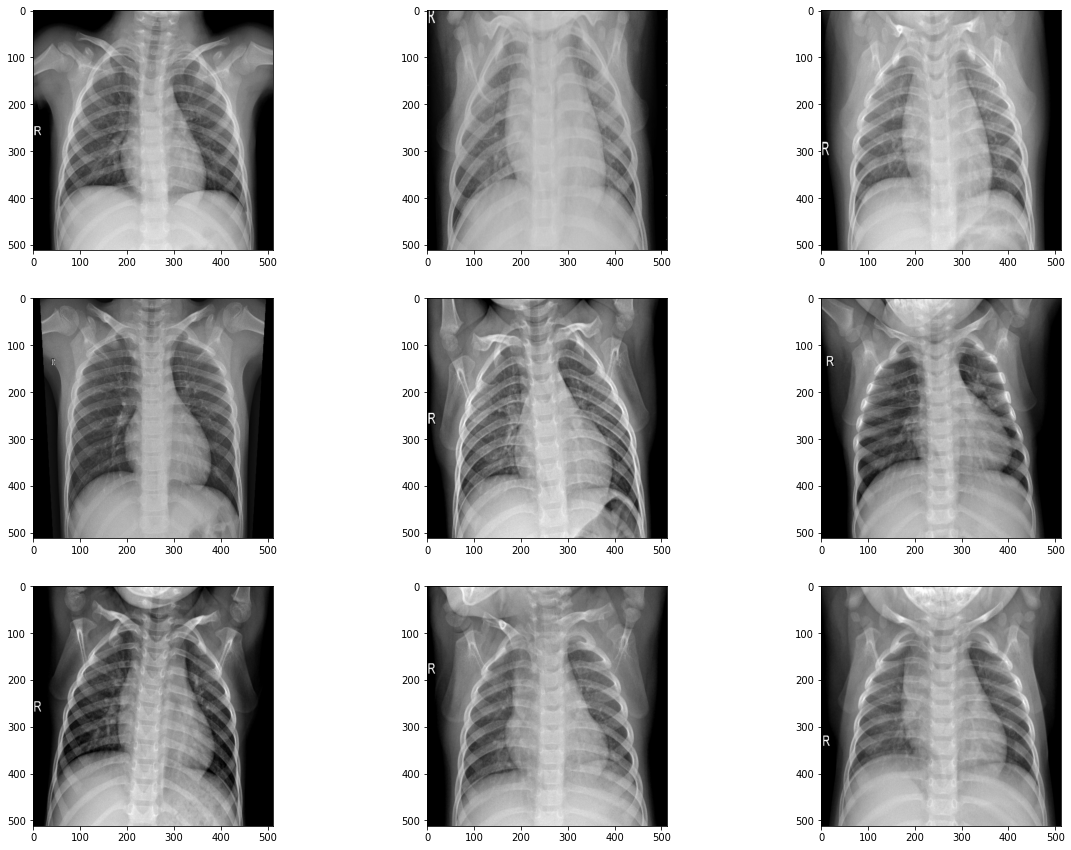

In [ ]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

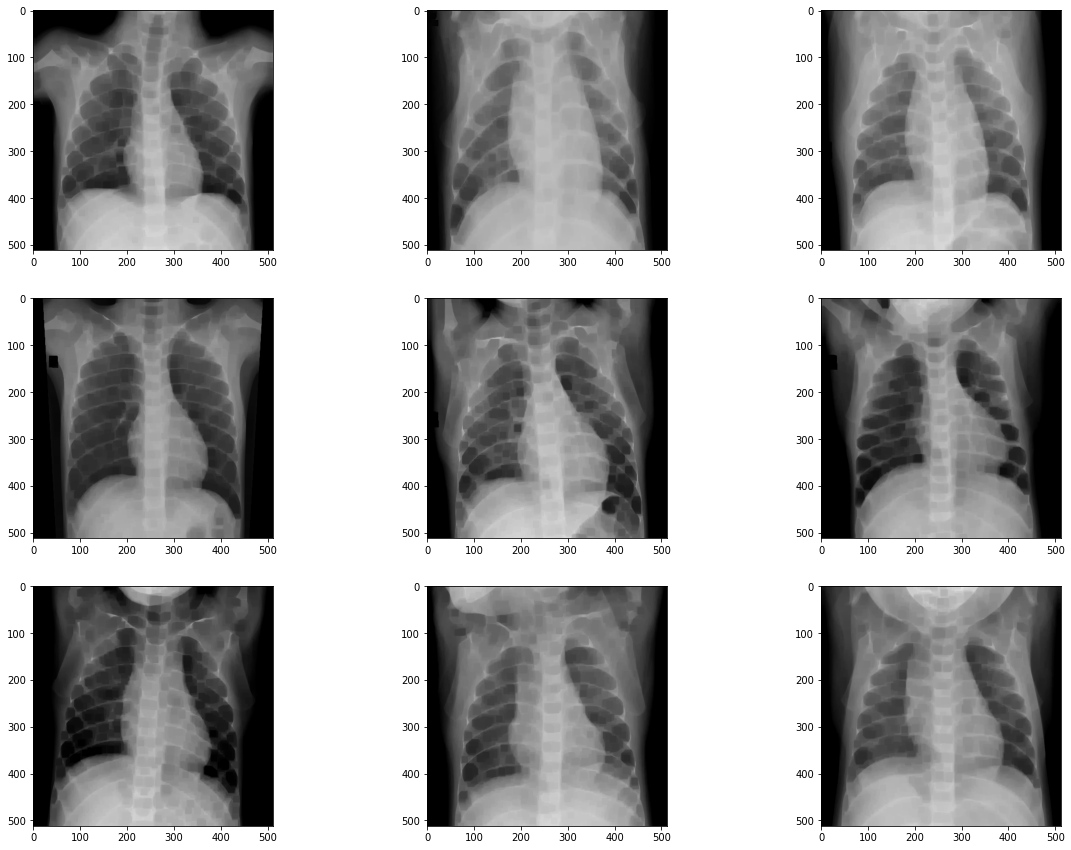

In [ ]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_erosion = cv2.erode(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_erosion)

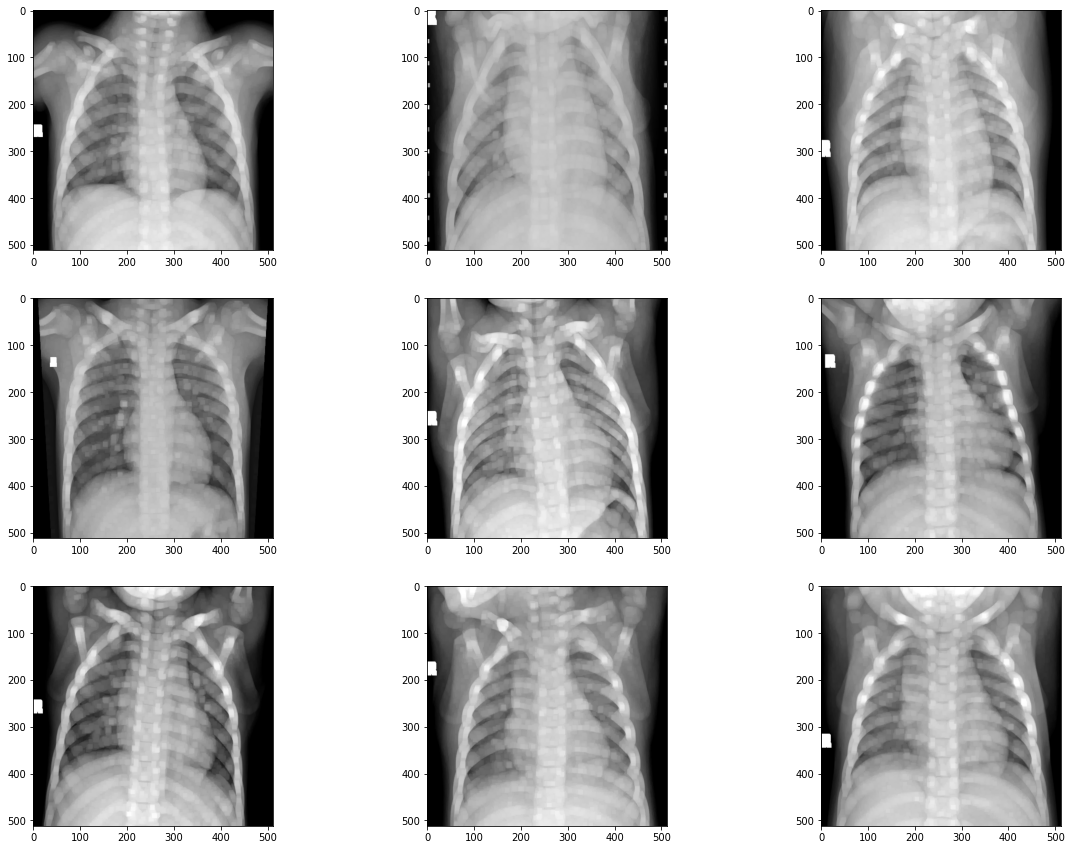

In [ ]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_dilation = cv2.dilate(img, kernel, iterations = 2)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_dilation)

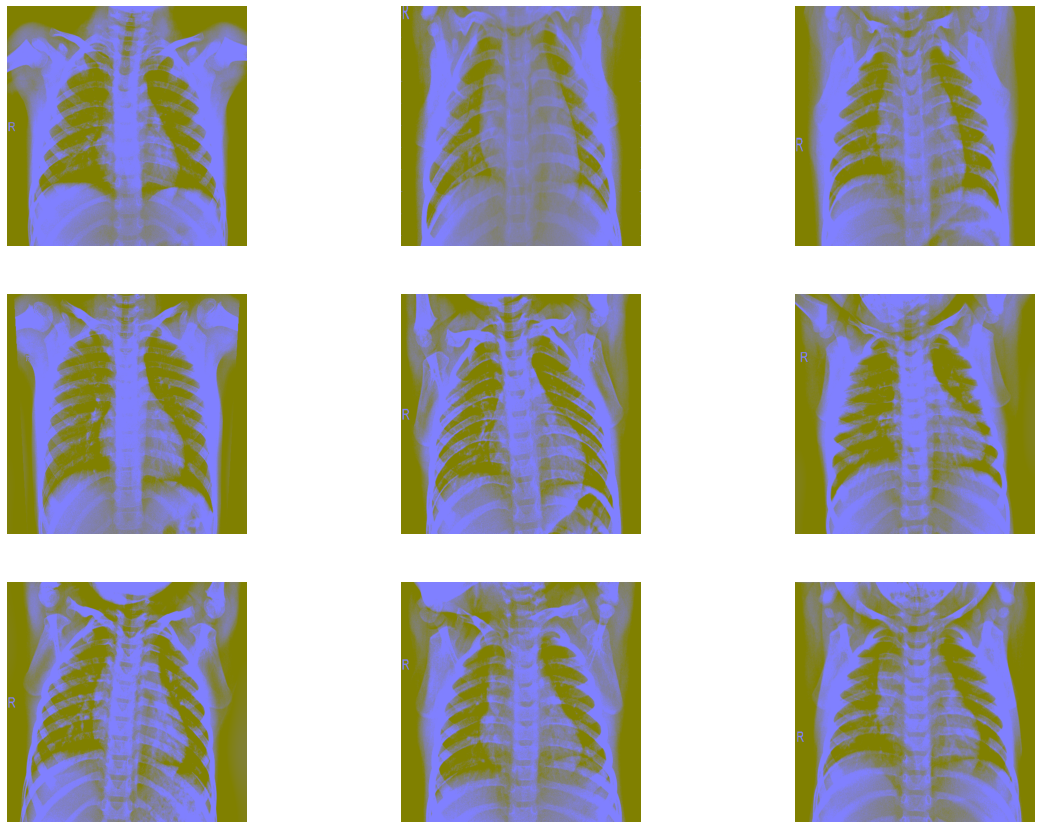

In [ ]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

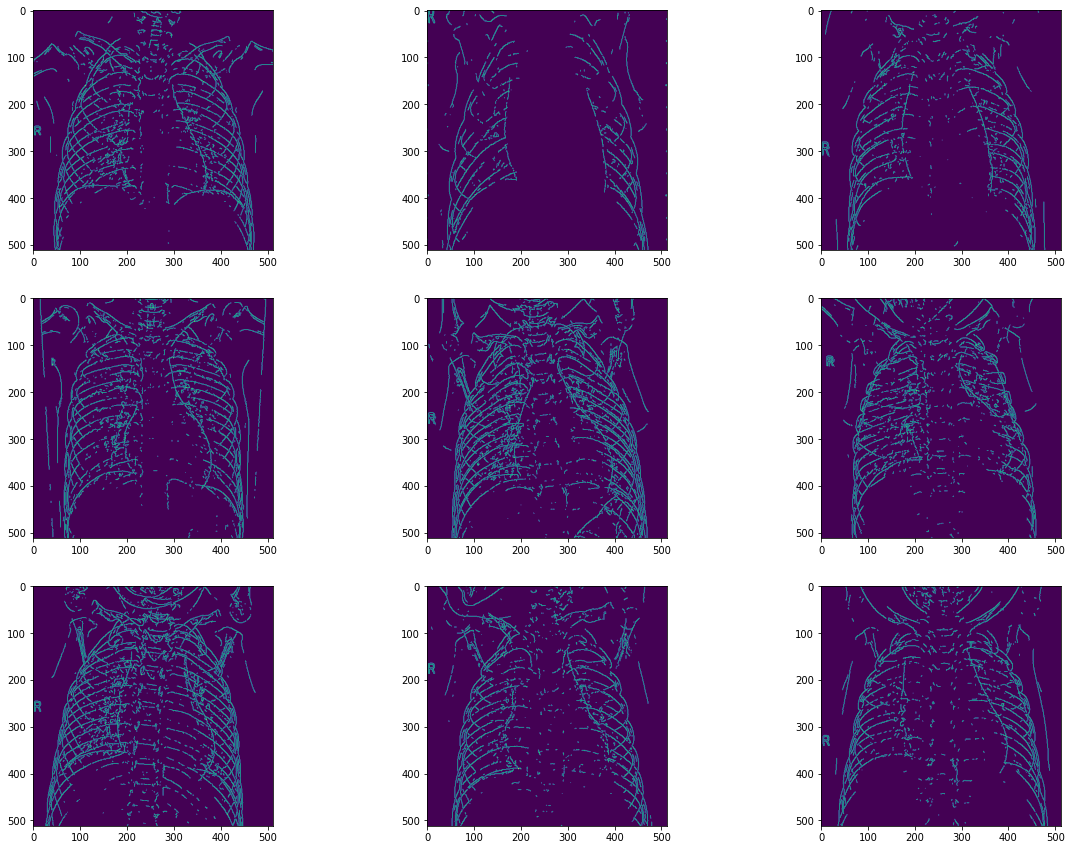

In [ ]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detected_edges = cv2.Canny(img, 80, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(detected_edges)

In [ ]:
train_dir = "/tmp/chest_xray/train"
test_dir = "/tmp/chest_xray/test"
validation_dir = "/tmp/chest_xray/val"

In [ ]:
%%time

train_datagen = ImageDataGenerator(
            rescale = 1/255.,
            horizontal_flip = True,
            vertical_flip = True,
            rotation_range = 0.3,
            zca_whitening = True,
            width_shift_range = 0.25,
            height_shift_range = 0.25,
            channel_shift_range = 0.35,
            shear_range = 0.2,
            zoom_range = 0.4)

val_test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
validation_set = val_test_datagen.flow_from_directory(validation_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
test_set = val_test_datagen.flow_from_directory(test_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
CPU times: user 124 ms, sys: 8.21 ms, total: 132 ms
Wall time: 145 ms


In [ ]:
'''
AUTOTUNE = tensorflow.data.experimental.AUTOTUNE

train_set = train_set.cache().prefetch(buffer_size = AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size = AUTOTUNE)
validation_set = validation_set.cache().prefetch(buffer_size = AUTOTUNE)
'''
pass

In [ ]:
base_model1 = VGG16(include_top = False, weights = "imagenet", input_shape = (224, 224, 3), pooling = "max",
                    classes = 2)

#base_model1.load_weights("../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
base_model1.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model2 = Sequential()
model2.add(base_model1)
model2.add(Flatten())

model2.add(Dense(128, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(32, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

# freeze the layers
for layer in base_model1.layers:
    layer.trainable = False

model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


In [ ]:
%%time
import tensorflow
early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience = 16,
                                                                    restore_best_weights = True,
                                                                    verbose = 1)

history = model2.fit_generator(train_set, epochs = 50, validation_data = validation_set, steps_per_epoch = 80)

Epoch 1/50
80/80 [==============================] - 30s 366ms/step - loss: 0.2485 - accuracy: 0.8969 - val_loss: 0.6747 - val_accuracy: 0.7500
Epoch 2/50
80/80 [==============================] - 30s 369ms/step - loss: 0.2433 - accuracy: 0.8992 - val_loss: 0.5579 - val_accuracy: 0.7500
Epoch 3/50
80/80 [==============================] - 29s 367ms/step - loss: 0.2515 - accuracy: 0.8883 - val_loss: 0.8777 - val_accuracy: 0.7500
Epoch 4/50
80/80 [==============================] - 29s 365ms/step - loss: 0.2245 - accuracy: 0.9031 - val_loss: 0.5253 - val_accuracy: 0.7500
Epoch 5/50
80/80 [==============================] - 28s 352ms/step - loss: 0.2264 - accuracy: 0.9094 - val_loss: 1.2101 - val_accuracy: 0.6875
Epoch 6/50
80/80 [==============================] - 28s 354ms/step - loss: 0.2369 - accuracy: 0.8953 - val_loss: 0.4223 - val_accuracy: 0.6875
Epoch 7/50
80/80 [==============================] - 29s 357ms/step - loss: 0.2375 - accuracy: 0.8914 - val_loss: 0.8688 - val_accuracy: 0.7500

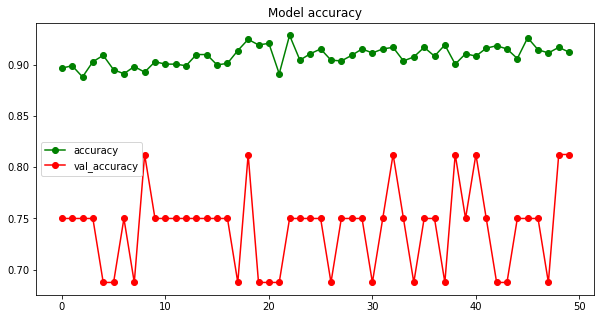

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

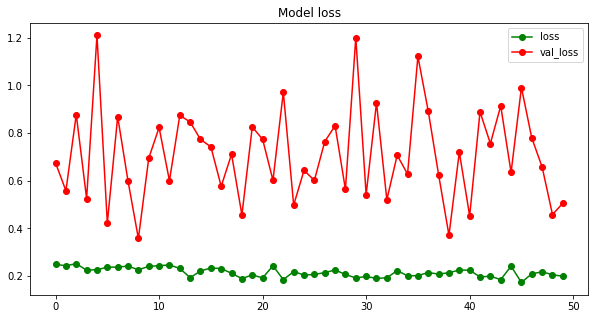

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

In [ ]:
test_loss, test_accuracy = model2.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

39/50 [======================>.......] - ETA: 2s - loss: 0.3307 - accuracy: 0.8349

50/50 [==============================] - 8s 155ms/step - loss: 0.3307 - accuracy: 0.8349
The testing accuracy is:  83.49359035491943 %
The testing loss is:  33.070334792137146 %


In [ ]:
import tensorflow as tf

model2.save("Pneumonia_VGG.h5")
model2 = tf.keras.Model(model2)
model2.save_weights("/content")

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Load the trained VGG model
model = load_model('/content/Pneumonia_VGG (1).h5')

# Set up an ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/tmp/chest_xray/test'
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224), # The input size for the VGG model
        batch_size=32,
        class_mode='binary', # Assumes binary classification (e.g. pneumonia vs. no pneumonia)
        shuffle=False)

# Use the model to make predictions on the test set
y_pred = model.predict_generator(test_generator)

# Convert the predictions from probabilities to class labels
y_pred = np.round(y_pred)

# Get the true labels for the test set
y_true = test_generator.classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)
print(confusion_mtx)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx, annot=True, annot_kws={"size": 16}, cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



Found 624 images belonging to 2 classes.


<ipython-input-7-4098631604fa>:21: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



[[212  22]
 [ 81 309]]


Found 624 images belonging to 2 classes.


<ipython-input-3-282cc38738d1>:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


20/20 [==============================] - 402s 20s/step


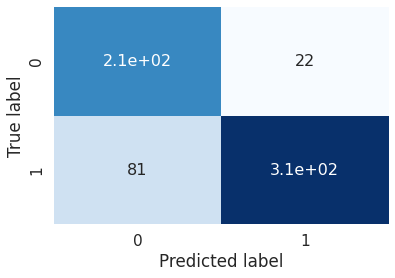

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

# Load the pre-trained VGG model
model = load_model('/content/Pneumonia_VGG (1).h5')

# Set up the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = '/tmp/chest_xray/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Make predictions on the test data
predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
y_pred = np.round(predictions)
y_true = test_generator.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

# Load the saved Keras model
model = load_model('/content/Pneumonia_VGG (1).h5')

# Set up the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = '/tmp/chest_xray/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Make predictions on the test data
predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
y_pred = np.round(predictions)
y_true = test_generator.classes

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Found 624 images belonging to 2 classes.


<ipython-input-10-0c91a5df9304>:21: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



20/20 [==============================] - 356s 17s/step
Accuracy: 0.8349
Precision: 0.9335
Recall: 0.7923
F1 Score: 0.8571
